In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from CSRandom import CSRandomLite as CSRandom


with open('omni_results.pkl','rb') as f:
    res = pickle.load(f)

In [15]:
res.shape

(500, 5000)

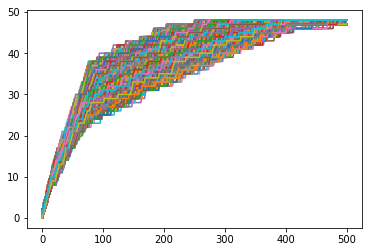

In [16]:
plt.plot(res)
plt.show()

In [17]:
mean = res.mean(axis=1)
mins = res.min(axis=1)
maxs = res.max(axis=1)
err = 2.567*res.std(axis=1)/np.sqrt(res.shape[1])
offset = 2.567*res.std(axis=1)

In [18]:
np.max(res)

48.0

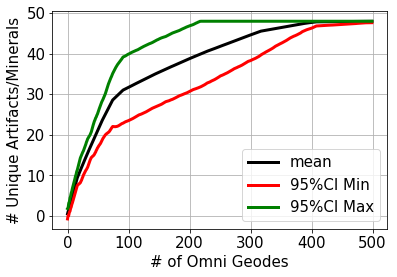

In [20]:
# plt.errorbar(range(len(mean)), mean, yerr=res.std(axis=1), c='c')
fig = plt.figure()
fig.patch.set_color('white')
plt.plot(range(len(mean)), mean,c='k',lw=3, label='mean')

plt.plot(range(len(mean)), mean-offset,c='r',lw=3, label='95%CI Min')
plt.plot(range(len(mean)), [min(48, m+o) for m,o in zip(mean,offset)],c='g',lw=3, label='95%CI Max')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('# of Omni Geodes', fontsize=15)
plt.ylabel('# Unique Artifacts/Minerals', fontsize=15)
plt.show()

/Users/andrewlong/miniconda3/envs/sdv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


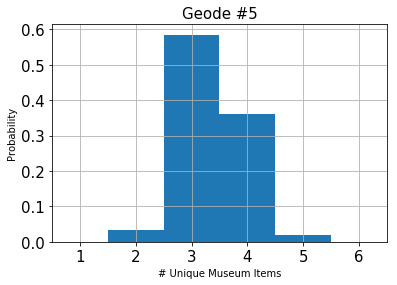

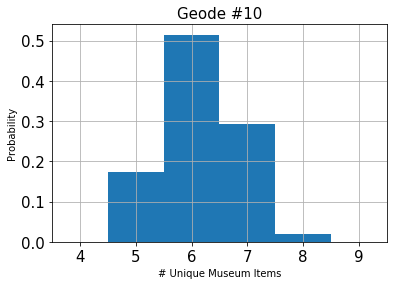

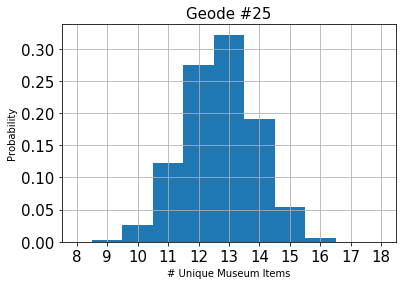

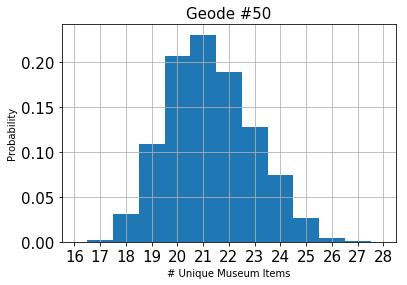

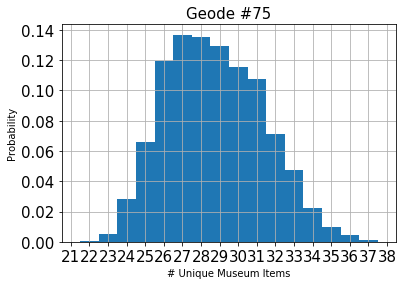

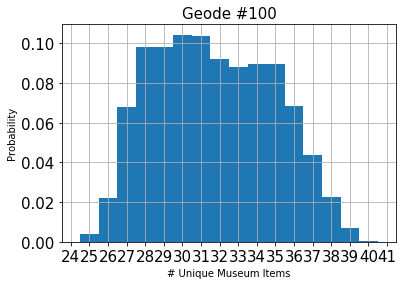

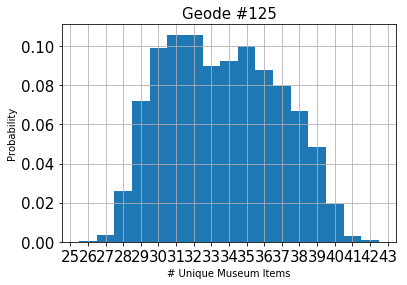

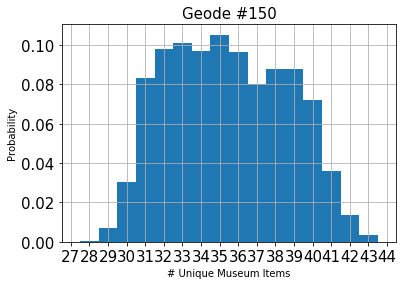

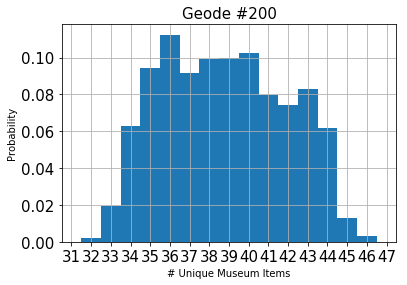

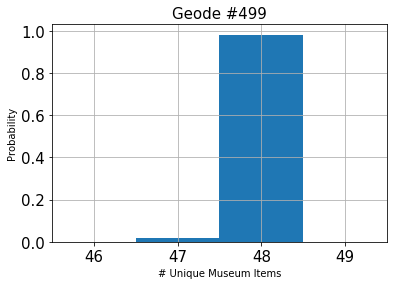

In [21]:
for idx in [5,10,25,50,75,100,125,150,200,499]:
    fig = plt.figure()
    fig.patch.set_color('white')
    min_val = min(res[idx,:])
    max_val = max(res[idx,:])
    plt.title('Geode #{}'.format(idx), fontsize=15)
    plt.grid()
    plt.hist(res[idx,:], bins=np.arange(min_val-1.5, max_val+1.5), align='mid', normed=True)
    plt.xlim(min_val-1.5, max_val+1.5)
    plt.xticks(np.arange(min_val-1, max_val+2), fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('# Unique Museum Items')
    plt.ylabel('Probability')
    plt.show()